In [1]:
# installations
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

In [2]:
# import libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

In [3]:
# Use PyCoinGecko API to create candlestick graph for bitcoin

# get coingecko object
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'usd', days = 30)

In [12]:
# see dictionary keys
bitcoin_data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [14]:
# get price info
bitcoin_price = bitcoin_data['prices']
bitcoin_price[0:5]
# this provides timestamp information as well as the price at that time

[[1621350248880, 43209.48688958563],
 [1621353706214, 43122.97490080718],
 [1621357367670, 43728.698585457074],
 [1621360975353, 43509.90326771379],
 [1621364548517, 42815.40466270814]]

In [15]:
# create dataframe
data=pd.DataFrame(bitcoin_price, columns = ['Timestamp', 'Price'])
data.head()

,Timestamp,Price
0,1621350248880,43209.486890
1,1621353706214,43122.974901
2,1621357367670,43728.698585
3,1621360975353,43509.903268
4,1621364548517,42815.404663


In [19]:
# convert timestamp into date for readability
data['Date'] = data['Timestamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data.head()

,Timestamp,Price,Date
0,1621350248880,43209.486890,2021-05-18
1,1621353706214,43122.974901,2021-05-18
2,1621357367670,43728.698585,2021-05-18
3,1621360975353,43509.903268,2021-05-18
4,1621364548517,42815.404663,2021-05-18


In [24]:
# group data by date and find min, max, first, and last prices of each day
candlestick_data = data.groupby(data.Date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data.head()

Date         Price                                          
                        min           max         first          last
0  2021-05-18  39040.080585  43728.698585  43209.486890  39040.080585
1  2021-05-19  36573.548038  40764.057604  39476.404289  39520.262361
2  2021-05-20  39294.592658  41947.196711  40029.853992  40094.258216
3  2021-05-21  34386.609592  41757.137345  39697.060393  36405.874807
4  2021-05-22  35920.891747  38546.599099  35946.677179  37237.822516

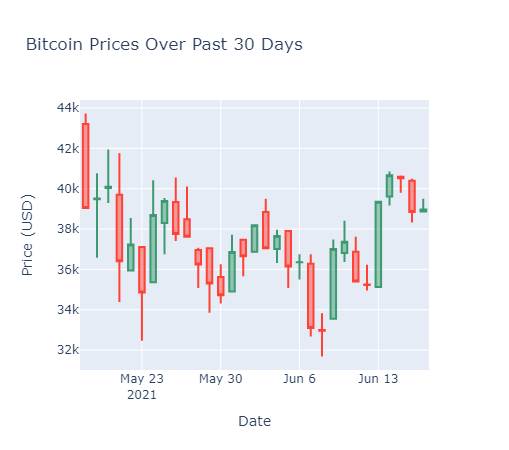

In [29]:
# plot the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['Date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

# update figure layout
fig.update_layout(xaxis_rangeslider_visible = False, xaxis_title = 'Date',
                 yaxis_title = 'Price (USD)', title = 'Bitcoin Prices Over Past 30 Days')


fig.show()